Check that our self-computed values for pop/assets exposure using TCE-DAt spatially explicit data are correct, by comparing to already computed TCE-DAT exposure indicators.

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [3]:
project_dir = Path().resolve().parents[2]

In [4]:
# TCE-DAT available data set, indicators at the country-event level
df_tce = pd.read_csv(project_dir.joinpath('data/TCE-DAT_historic-exposure_1950-2015.csv'), skiprows=6)
for v in [34, 64, 96]:
    df_tce.rename(columns={f'{v}kn_pop': f'pop_{v}kn', f'{v}kn_assets': f'assets_{v}kn'}, inplace=True)

# Indicators combined by us in R, with coastline distances conditions
df_cl = pd.read_csv(project_dir.joinpath('data/tce_dat_cl_distances_r_output.csv'))

In [5]:
df_tce.head()

,year,IBTrACS_ID,TC_name,NatCatSERVICE_ID,genesis_basin,countries_affected,ISO3,v_land_SI,v_land_kn,pop_34kn,assets_34kn,pop_64kn,assets_64kn,pop_96kn,assets_96kn
0,1950,1950166N14262,UNNAMED,NaN,EP,single,MEX,47.3,92.0,1435042.0,7.167764e+09,144515.0,5.596732e+08,0.0,0.0
1,1950,1950174N17126,ELSIE,NaN,WP,multi,JPN,51.7,100.6,8460128.0,7.167389e+10,777936.0,7.370407e+09,19705.0,233596698.0
2,1950,1950174N17126,ELSIE,NaN,WP,multi,KOR,19.5,37.8,405469.0,8.689325e+08,0.0,0.000000e+00,0.0,0.0
3,1950,1950185N18254,UNNAMED,NaN,EP,single,MEX,28.8,55.9,194386.0,9.145901e+08,0.0,0.000000e+00,0.0,0.0
4,1950,1950191N12149,UNNAMED,NaN,WP,single,JPN,26.0,50.5,149524.0,1.962303e+09,0.0,0.000000e+00,0.0,0.0


In [6]:
df_cl.head()

,year,IBTrACS_ID,ISO3,pop_34kn,pop_64kn,pop_96kn,assets_34kn,assets_64kn,assets_96kn,pop_34kn_5km,...,pop_96kn_15km,assets_34kn_15km,assets_64kn_15km,assets_96kn_15km,pop_34kn_30km,pop_64kn_30km,pop_96kn_30km,assets_34kn_30km,assets_64kn_30km,assets_96kn_30km
0,1950,1950166N14262,MEX,1.435042e+06,144514.760862,0.000000,7.167764e+09,5.596732e+08,0.000000e+00,1.511726e+05,...,0.000000,1.814476e+09,4.357072e+08,0.000000e+00,7.637151e+05,142266.342695,0.000000,2.760891e+09,5.392150e+08,0.000000e+00
1,1950,1950174N17126,JPN,8.460128e+06,777936.359565,19704.633461,7.167389e+10,7.370407e+09,2.335967e+08,3.001922e+06,...,19704.633461,5.334348e+10,7.370407e+09,2.335967e+08,8.230620e+06,777936.359565,19704.633461,6.854200e+10,7.370407e+09,2.335967e+08
2,1950,1950174N17126,KOR,4.054694e+05,0.000000,0.000000,8.689325e+08,0.000000e+00,0.000000e+00,3.437433e+05,...,0.000000,8.689325e+08,0.000000e+00,0.000000e+00,4.054694e+05,0.000000,0.000000,8.689325e+08,0.000000e+00,0.000000e+00
3,1950,1950185N18254,MEX,1.943859e+05,0.000000,0.000000,9.145901e+08,0.000000e+00,0.000000e+00,4.384937e+04,...,0.000000,4.938643e+08,0.000000e+00,0.000000e+00,1.681960e+05,0.000000,0.000000,6.512574e+08,0.000000e+00,0.000000e+00
4,1950,1950191N12149,JPN,1.495236e+05,0.000000,0.000000,1.962303e+09,0.000000e+00,0.000000e+00,3.564081e+04,...,0.000000,1.206838e+09,0.000000e+00,0.000000e+00,1.350129e+05,0.000000,0.000000,1.647435e+09,0.000000e+00,0.000000e+00


# Merge data and look at differences

In [7]:
df_left = df_tce.join(df_cl.set_index(['IBTrACS_ID', 'ISO3']), on=['IBTrACS_ID', 'ISO3'], lsuffix='_tce', rsuffix='_cl')
df_right = df_tce.join(df_cl.set_index(['IBTrACS_ID', 'ISO3']), on=['IBTrACS_ID', 'ISO3'], lsuffix='_tce', rsuffix='_cl', how='right')
df_outer = df_tce.join(df_cl.set_index(['IBTrACS_ID', 'ISO3', 'year']), on=['IBTrACS_ID', 'ISO3', 'year'], lsuffix='_tce', rsuffix='_cl', how='outer')
df_inner = df_tce.join(df_cl.set_index(['IBTrACS_ID', 'ISO3', 'year']), on=['IBTrACS_ID', 'ISO3', 'year'], 
                       lsuffix='_tce', rsuffix='_cl', how='inner')

print(f'country-events in TCE-DAT, but not computed by us: {len(df_left) - len(df_inner)}')
# should be 2 from 1 very small country-event: http://ibtracs.unca.edu/index.php?name=v04r00-1957245N13339
print(f'country-events computed by us, but not in TCE-DAT: {len(df_right) - len(df_inner)}')
print(f'Country-events matched : {len(df_inner)} / {len(df_outer)}')

df = df_inner.drop(columns=['NatCatSERVICE_ID', 'genesis_basin', 'countries_affected', 'v_land_SI'])

country-events in TCE-DAT, but not computed by us: 0
country-events computed by us, but not in TCE-DAT: 2
Country-events matched : 5335 / 5337


In [8]:
df.head()

,year,IBTrACS_ID,TC_name,ISO3,v_land_kn,pop_34kn_tce,assets_34kn_tce,pop_64kn_tce,assets_64kn_tce,pop_96kn_tce,...,pop_96kn_15km,assets_34kn_15km,assets_64kn_15km,assets_96kn_15km,pop_34kn_30km,pop_64kn_30km,pop_96kn_30km,assets_34kn_30km,assets_64kn_30km,assets_96kn_30km
0,1950,1950166N14262,UNNAMED,MEX,92.0,1435042.0,7.167764e+09,144515.0,5.596732e+08,0.0,...,0.000000,1.814476e+09,4.357072e+08,0.000000e+00,7.637151e+05,142266.342695,0.000000,2.760891e+09,5.392150e+08,0.000000e+00
1,1950,1950174N17126,ELSIE,JPN,100.6,8460128.0,7.167389e+10,777936.0,7.370407e+09,19705.0,...,19704.633461,5.334348e+10,7.370407e+09,2.335967e+08,8.230620e+06,777936.359565,19704.633461,6.854200e+10,7.370407e+09,2.335967e+08
2,1950,1950174N17126,ELSIE,KOR,37.8,405469.0,8.689325e+08,0.0,0.000000e+00,0.0,...,0.000000,8.689325e+08,0.000000e+00,0.000000e+00,4.054694e+05,0.000000,0.000000,8.689325e+08,0.000000e+00,0.000000e+00
3,1950,1950185N18254,UNNAMED,MEX,55.9,194386.0,9.145901e+08,0.0,0.000000e+00,0.0,...,0.000000,4.938643e+08,0.000000e+00,0.000000e+00,1.681960e+05,0.000000,0.000000,6.512574e+08,0.000000e+00,0.000000e+00
4,1950,1950191N12149,UNNAMED,JPN,50.5,149524.0,1.962303e+09,0.0,0.000000e+00,0.0,...,0.000000,1.206838e+09,0.000000e+00,0.000000e+00,1.350129e+05,0.000000,0.000000,1.647435e+09,0.000000e+00,0.000000e+00


In [9]:
cols = [f'{exposed}_{v}kn' for exposed in ['pop', 'assets'] for v in [34, 64, 96]]
cols

['pop_34kn',
 'pop_64kn',
 'pop_96kn',
 'assets_34kn',
 'assets_64kn',
 'assets_96kn']

In [10]:
# compute errors
for c in cols:
    df[c + '_error'] = df[c + '_cl'] - df[c + '_tce']
df_e = df[['year', 'IBTrACS_ID', 'ISO3'] + [c + '_error' for c in cols]]

In [11]:
df_e.describe()

,year,pop_34kn_error,pop_64kn_error,pop_96kn_error,assets_34kn_error,assets_64kn_error,assets_96kn_error
count,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000
mean,1983.676664,0.008735,0.003526,-0.001462,-0.002852,0.001245,0.000133
std,18.992693,0.287427,0.195407,0.117544,0.747393,0.394856,0.138176
min,1950.000000,-0.500000,-0.499924,-0.499917,-5.535889,-5.503174,-0.688232
25%,1967.000000,-0.241539,0.000000,0.000000,-0.250336,0.000000,0.000000
50%,1985.000000,0.014185,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,0.260726,0.000000,0.000000,0.243428,0.000000,0.000000
max,2015.000000,0.499985,0.499987,0.496972,23.775391,5.250000,5.356201


In [13]:
print(df_e.max())

year                          2015
IBTrACS_ID           2015355S16136
ISO3                           ZWE
pop_34kn_error            0.499985
pop_64kn_error            0.499987
pop_96kn_error            0.496972
assets_34kn_error          23.7754
assets_64kn_error             5.25
assets_96kn_error           5.3562
dtype: object


In [11]:
df.assets_34kn_tce.describe()

count    5.335000e+03
mean     1.860146e+11
std      7.124944e+11
min      0.000000e+00
25%      3.550692e+08
50%      5.766770e+09
75%      5.477699e+10
max      1.040449e+13
Name: assets_34kn_tce, dtype: float64

This looks good !
Maximum error is ±0.5 person, and 23$ assets (min assets exposure is 740, median is 5.7e9)

# Save the merged dataset
Keep the original TCE-DAT dataset (with events names, etc), but add newly computed columns when we have them

In [12]:
cols

['pop_34kn',
 'pop_64kn',
 'pop_96kn',
 'assets_34kn',
 'assets_64kn',
 'assets_96kn']

In [13]:
# drop redundant columns
df_final = df_inner.drop(columns=[c + '_tce' for c in cols]).rename(columns={c + '_cl': c for c in cols})

In [14]:
df_final.columns

Index(['year', 'IBTrACS_ID', 'TC_name', 'NatCatSERVICE_ID', 'genesis_basin',
       'countries_affected', 'ISO3', 'v_land_SI', 'v_land_kn', 'pop_34kn',
       'pop_64kn', 'pop_96kn', 'assets_34kn', 'assets_64kn', 'assets_96kn',
       'pop_34kn_5km', 'pop_64kn_5km', 'pop_96kn_5km', 'assets_34kn_5km',
       'assets_64kn_5km', 'assets_96kn_5km', 'pop_34kn_15km', 'pop_64kn_15km',
       'pop_96kn_15km', 'assets_34kn_15km', 'assets_64kn_15km',
       'assets_96kn_15km', 'pop_34kn_30km', 'pop_64kn_30km', 'pop_96kn_30km',
       'assets_34kn_30km', 'assets_64kn_30km', 'assets_96kn_30km'],
      dtype='object')

In [15]:
# check that we still have the same number of events
assert len(df_final) == len(df_tce)
for c in df_tce.columns:
    assert c in df_final.columns

In [16]:
# save the merged dataframe
df_final.to_csv(project_dir.joinpath('data/TCE-DAT_historic-exposure_1950-2015_cl_distances.csv'), index=False)

# Plot the results

Nothing really surprising, just a sanity check. 

It seems that the median value decreases to ~20%/30% of baseline value when considering assets/pop d_to_cl < 5km, and up to 70%/80% for d < 30km

In [17]:
df_final.columns

Index(['year', 'IBTrACS_ID', 'TC_name', 'NatCatSERVICE_ID', 'genesis_basin',
       'countries_affected', 'ISO3', 'v_land_SI', 'v_land_kn', 'pop_34kn',
       'pop_64kn', 'pop_96kn', 'assets_34kn', 'assets_64kn', 'assets_96kn',
       'pop_34kn_5km', 'pop_64kn_5km', 'pop_96kn_5km', 'assets_34kn_5km',
       'assets_64kn_5km', 'assets_96kn_5km', 'pop_34kn_15km', 'pop_64kn_15km',
       'pop_96kn_15km', 'assets_34kn_15km', 'assets_64kn_15km',
       'assets_96kn_15km', 'pop_34kn_30km', 'pop_64kn_30km', 'pop_96kn_30km',
       'assets_34kn_30km', 'assets_64kn_30km', 'assets_96kn_30km'],
      dtype='object')

In [18]:
df = df_final.dropna(subset=['pop_34kn_5km']).melt(
    id_vars=['year', 'IBTrACS_ID', 'TC_name', 'ISO3', 'v_land_kn'],
    value_vars=['pop_34kn', 'pop_64kn', 'pop_96kn', 'assets_34kn', 'assets_64kn', 'assets_96kn',
                'pop_34kn_5km', 'pop_64kn_5km', 'pop_96kn_5km', 'assets_34kn_5km',
                'assets_64kn_5km', 'assets_96kn_5km', 'pop_34kn_15km', 'pop_64kn_15km',
                'pop_96kn_15km', 'assets_34kn_15km', 'assets_64kn_15km',
                'assets_96kn_15km', 'pop_34kn_30km', 'pop_64kn_30km', 'pop_96kn_30km',
                'assets_34kn_30km', 'assets_64kn_30km', 'assets_96kn_30km'],
    var_name='indicator')
df = df.dropna()
df['min_windspeed'] = df.indicator.apply(lambda x: int(x.split('_')[1][:2]))
df['dist_to_cl'] = df.indicator.apply(lambda x: int(x.split('_')[2][:-2] if len(x.split('_')) == 3 else -1))
df['exposed'] = df.indicator.apply(lambda x: x.split('_')[0])
df['log_value'] = np.log(df.value.clip(lower=1))

In [19]:
df.head()

,year,IBTrACS_ID,TC_name,ISO3,v_land_kn,indicator,value,min_windspeed,dist_to_cl,exposed,log_value
0,1950,1950166N14262,UNNAMED,MEX,92.0,pop_34kn,1.435042e+06,34,-1,pop,14.176705
1,1950,1950174N17126,ELSIE,JPN,100.6,pop_34kn,8.460128e+06,34,-1,pop,15.950875
2,1950,1950174N17126,ELSIE,KOR,37.8,pop_34kn,4.054694e+05,34,-1,pop,12.912801
3,1950,1950185N18254,UNNAMED,MEX,55.9,pop_34kn,1.943859e+05,34,-1,pop,12.177600
4,1950,1950191N12149,UNNAMED,JPN,50.5,pop_34kn,1.495236e+05,34,-1,pop,11.915210


In [20]:
df.groupby(['exposed', 'dist_to_cl']).value.describe()

count          mean           std  min  25%  \
exposed dist_to_cl                                                 
assets  -1          8883.0  1.064666e+11  5.406596e+11  0.0  0.0   
         5          8883.0  2.289642e+10  1.156870e+11  0.0  0.0   
         15         8883.0  5.446553e+10  2.793100e+11  0.0  0.0   
         30         8883.0  7.465946e+10  3.930282e+11  0.0  0.0   
pop     -1          8883.0  3.448634e+06  9.219815e+06  0.0  0.0   
         5          8883.0  7.511230e+05  1.916467e+06  0.0  0.0   
         15         8883.0  1.812416e+06  4.739998e+06  0.0  0.0   
         30         8883.0  2.435148e+06  6.517037e+06  0.0  0.0   

                             50%           75%           max  
exposed dist_to_cl                                            
assets  -1          3.847033e+08  1.593945e+10  1.040449e+13  
         5          7.681741e+07  3.478686e+09  3.000973e+12  
         15         2.218153e+08  8.019530e+09  5.302395e+12  
         30         2.788666e+08  1.062129e+10  7.744767e+12  
pop     -1          1.494433e+04  1.926904e+06  1.075190e+08  
         5          4.232202e+03  3.827496e+05  1.878323e+07  
         15         9.999461e+03  9.886713e+05  5.555711e+07  
         30         1.224932e+04  1.269500e+06  8.023111e+07

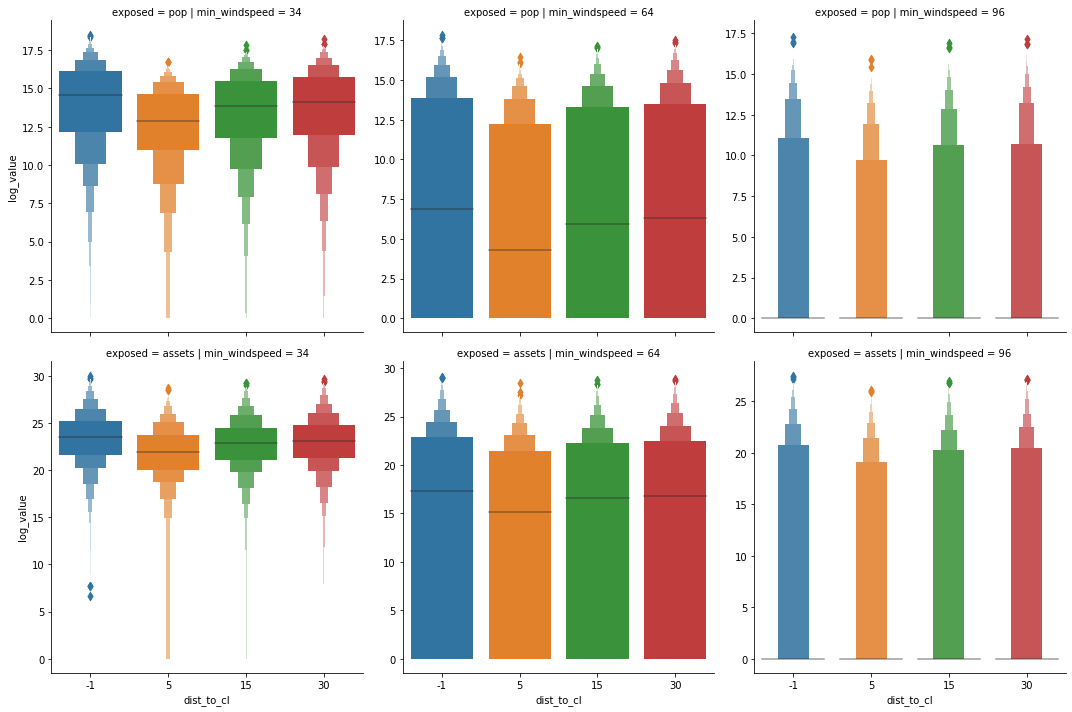

In [21]:
g = sns.catplot(x='dist_to_cl', y='log_value', col='min_windspeed', row='exposed', kind='boxen', data=df, sharey=False)
#g.set(yscale='log')

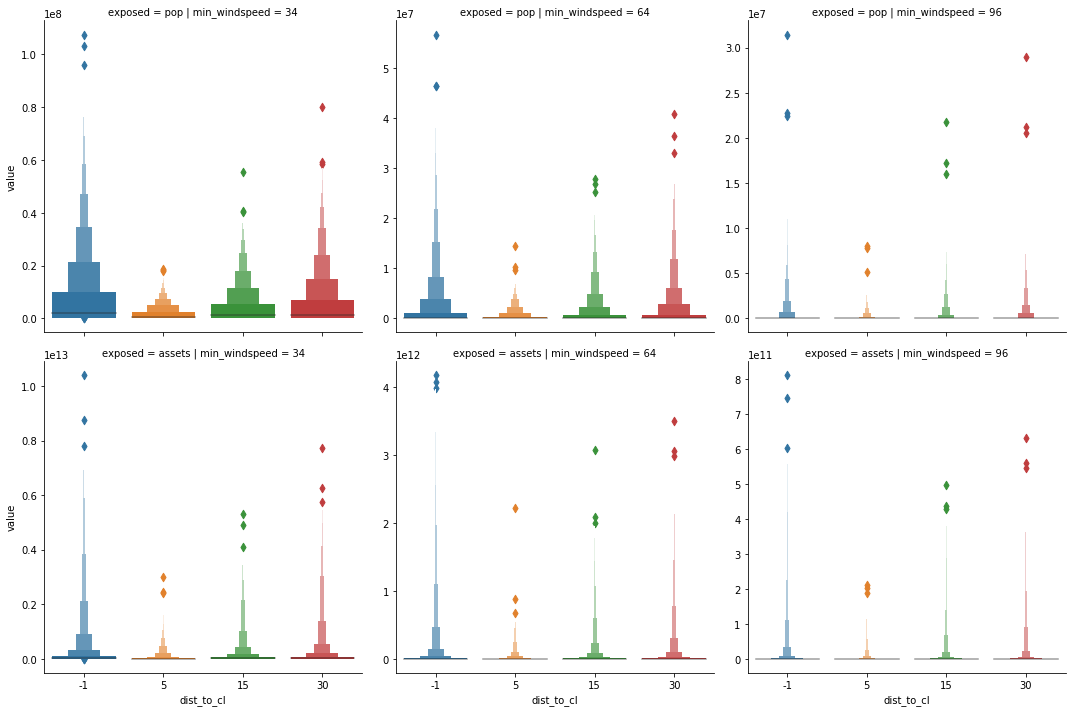

In [22]:
g = sns.catplot(x='dist_to_cl', y='value', col='min_windspeed', row='exposed', kind='boxen', data=df, sharey=False)
#g.set(yscale='log')

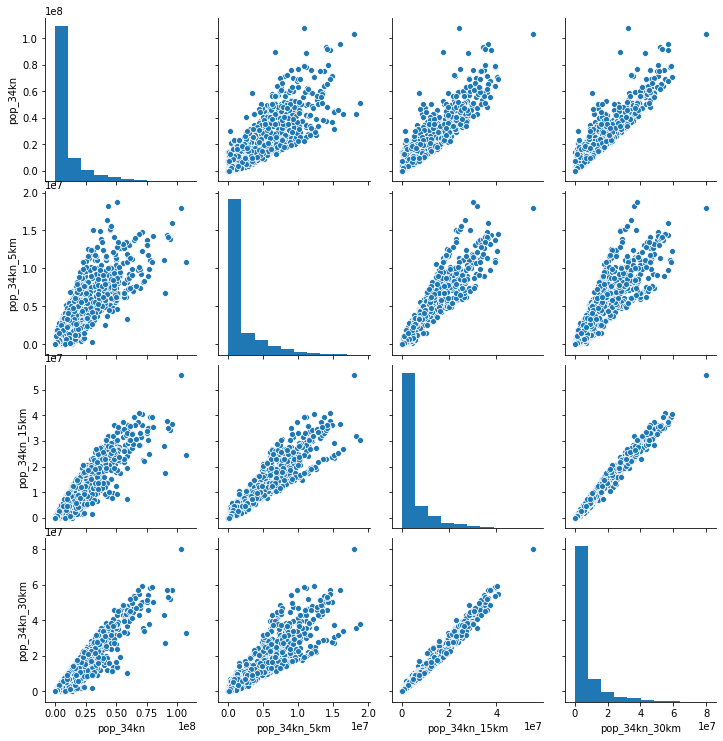

In [23]:
sns.pairplot(df_final[['pop_34kn'] + [f'pop_34kn_{d}km' for d in [5, 15, 30]]].dropna())